In [1]:
c = lambda f: 5 / 9 * (f - 32)

In [2]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [3]:
import pandas as pd

In [4]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

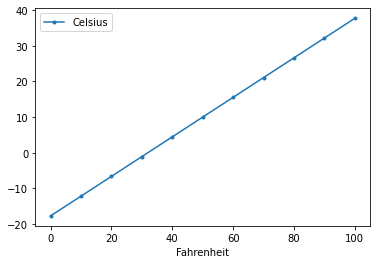

In [5]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

In [6]:
y_label = axes.set_ylabel('Celsius')

In [7]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [8]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [9]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [10]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [11]:
nyc.Date.dtype

dtype('int64')

In [12]:
nyc.Date = nyc.Date.floordiv(100)

In [13]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [14]:
pd.set_option('precision', 2)

In [15]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [16]:
from scipy import stats

In [17]:
linear_regression = stats.linregress(x=nyc.Date,
                                     
y=nyc.Temperature)

In [18]:
linear_regression.slope

0.014771361132966163

In [19]:
linear_regression.intercept

8.694993233674289

In [20]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [21]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [22]:
import seaborn as sns

In [23]:
sns.set_style('whitegrid')

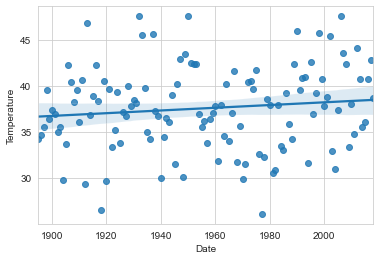

In [24]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

In [25]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [26]:
year = 2019

In [27]:
slope = linear_regression.slope

In [28]:
intercept = linear_regression.intercept

In [29]:
temperature = slope * year + intercept

In [30]:
while temperature < 40.0:
    year += 1
    temperature = slope * year + intercept

In [31]:
year

2120

In [ ]:
#IvanQuackenbush